# EDA

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
import pickle

## Importar el dataset

In [3]:
total_data=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

total_data.to_csv("../data/raw/total_data.csv", index = False)

print(total_data.shape)

total_data.info()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Eliminación de duplicados e información irrelevante

In [4]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.shape

(768, 9)

In [5]:
total_data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
total_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Análisis de variables univariante

En este caso son todas numéricas: 
- Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
### Numéricas

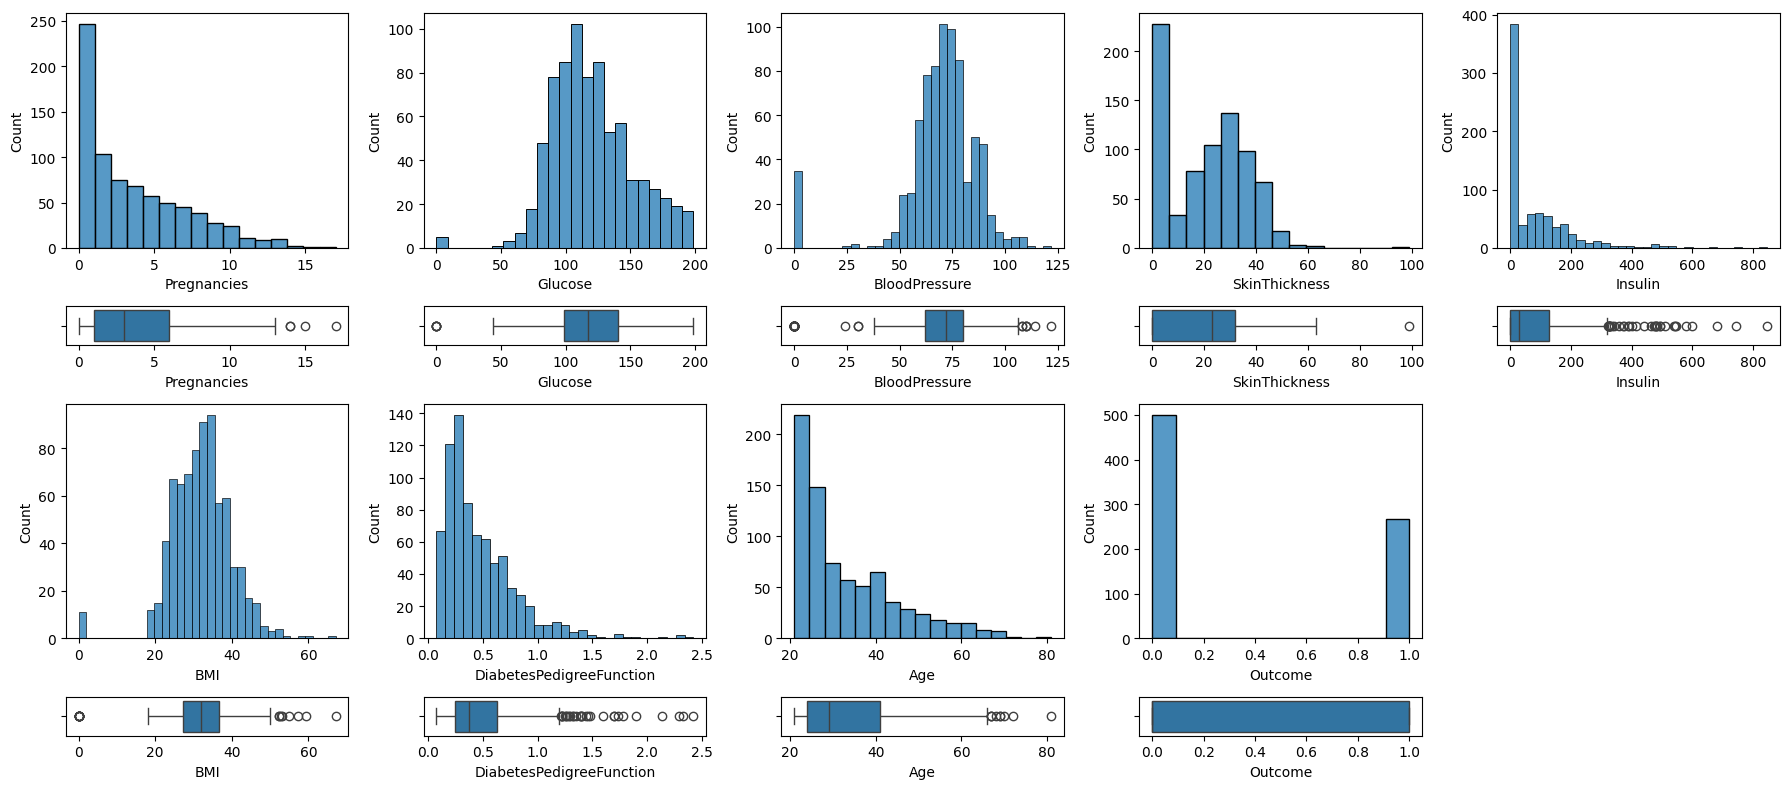

In [7]:
fig, axis = plt.subplots(4, 5, figsize=(18, 8), gridspec_kw={"height_ratios": [6, 1] * 2})

sns.histplot(ax=axis[0, 0], data=total_data, x="Pregnancies")
sns.boxplot(ax=axis[1, 0], data=total_data, x="Pregnancies")

sns.histplot(ax=axis[0, 1], data=total_data, x="Glucose")
sns.boxplot(ax=axis[1, 1], data=total_data, x="Glucose")

sns.histplot(ax=axis[0, 2], data=total_data, x="BloodPressure")
sns.boxplot(ax=axis[1, 2], data=total_data, x="BloodPressure")

sns.histplot(ax=axis[0, 3], data=total_data, x="SkinThickness")
sns.boxplot(ax=axis[1, 3], data=total_data, x="SkinThickness")

sns.histplot(ax=axis[0, 4], data=total_data, x="Insulin")
sns.boxplot(ax=axis[1, 4], data=total_data, x="Insulin")

sns.histplot(ax=axis[2, 0], data=total_data, x="BMI")
sns.boxplot(ax=axis[3, 0], data=total_data, x="BMI")

sns.histplot(ax=axis[2, 1], data=total_data, x="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[3, 1], data=total_data, x="DiabetesPedigreeFunction")

sns.histplot(ax=axis[2, 2], data=total_data, x="Age")
sns.boxplot(ax=axis[3, 2], data=total_data, x="Age")

sns.histplot(ax=axis[2, 3], data=total_data, x="Outcome")
sns.boxplot(ax=axis[3, 3], data=total_data, x="Outcome")

fig.delaxes(axis[2,4])
fig.delaxes(axis[3,4])

plt.tight_layout()

plt.show()

- `Pregnancies`: el dato más habitual es 0. Hay algunos outliers
- `Glucose`: hay un número considerable de valores 0, lo cual no es posible. Tiene outliers en ambos extremo

